11/24/2018
# Learning and Exploring Artificial Neural Networks
This notebook is to track my progress with learning artificial neural networks and the tools of the industry, including JupyterLab.

# History
Artificial Neural Networks (ANN's) are inspired by the brain, a biological neural networks.  Neural networks are made up of connected neurons to carry out specific functions/computations when activated.  Warren McCulloch a neurophysiologist and Walter Pitts a logician who worked in the field of computational neuroscience created computational models based on mathematical algorithms called threshold logic.  Frank Rosenblatt introduced the perceptron in 1958 inspired by the earlier work of Warren McCulloch.  There was an optimism about the power of the perceptron.  In the 1960's the optimism came to a halt after  Marvin Minksy's and Papert's 1969 book, Perceptrons, was published.  The book suggested there was severe limitations to what the perceptron can do and that Frank's claims were exaggerated. This had a negative effect of the research community and research in connectionism stopped for 10 years.

# What is a Neuron
A neuron is a cell in the brain that superficially accepts an input and produces an output.

All pictures below or in the same orientation from right to left for a better comparison.

**First let's see what a real neuron in the brain looks like.**
<figure>
  <img src="Images/blakerichards_neuron.jpg" style="width:50%" />
  <figcaption>Image of a neuron recorded in Blake Richard’s lab (credit: Blake Richards)</figcaption>
</figure> 

**Now lets look at the structure of the neuron in this illustration.**
<figure>
  <img src="Images/cartoon_neuron.png" style="width:50%" />
  <figcaption>Biological Neuron Structure</figcaption>
</figure> 

**Now lets look at the computational graph/model.  This is what will be implemented in code.**
<figure>
  <img src="Images/abstract_perceptron2.png" style="width:50%" />
  <figcaption>Perceptron Structure</figcaption>
</figure> 


# Perceptron
Let's look a the perceptron in more detail and describe it more formally and implement one.  A perceptron is more formally called a binary classifier, a type of linear classifier, and it's designed to predict the inputs category.  A classifier sepearates data into categories.  Our brains do this without much effort, such as, classifying mammales and reptiles, 2 and 4 legged animales, things by different colors, by smell and ect.  The perceptron simpley takes some inputs and performs a mathematical process and spits out an output/classification/prediction.

Before implementing the perceptron, more details about the neurons' algorithm need to be known in the picture above. The inputs are passed into the neuron along connections with some weights, indicated below by $w_1$ and $w_2$ below. (Note: the x and y axis's represent $x_1$ and $x_2$ repectively).

<figure>
  <img src="Images/abstract_perceptron3.png" style="width:50%">
  <figcaption>Perceptron Structure - Details</figcaption>
</figure> 

The neurons' algorithm computes the output in two steps by computing the...

<dl>
  <dt>1. Weighted Sum of the Inputs</dt>
  <dd>This is the sum of all inputs multiplied by their weighted connections.  In the picture above, the weighted sum is $x_1 \cdot w_1+x_2 \cdot w_2$</dd>

  <dt>2. Activation Function</dt>
  <dd>This is an important concept in neural network based machine learning.  There're many
      different types of activation functions and they allow the output to be conformed to a desired range.
  </dd>
</dl>

The output of the perceptron that will be implemented will be -1 or 1.  What mathematical function can turn any number (the weighted sum) into -1 or 1?  The Sign function is one such function, and it will be used as the activation function in the implementation.  The formal Sign function is defined as follows,

\begin{equation}
  sgn(x)=\begin{cases}
    -1, & \text{if $x<0$},\\
    0, & \text{if $x=0$},\\
    1, & \text{if $x>0$}
  \end{cases}
\end{equation}

, but to simplify it for implementation purposes, it's been modified as follows,

\begin{equation}
  sgn(x)=\begin{cases}
    -1, & \text{if $x<0$},\\
    1, & \text{if $x\geq0$}
  \end{cases}
\end{equation}

The perceptron image can now be viewed more formally as, 

<figure>
  <img src="Images/abstract_perceptron.png" style="width:50%">
  <figcaption>Formal Perceptron Structure - Details</figcaption>
</figure> 

This whole process is called Feed Forward such that the weighted sum is computed and passed into the activation function. The activation function will then produce the output/prediction.  Simply, the function below is computed to produce a prediction, where the prediction is either -1 or 1.

$$prediction = sgn(x_1 \cdot w_1+x_2 \cdot w_2)$$

$x_1$ and $x_2$ are the points in the training data.  Each point will be fed into this equation to compute a prediction, but what are the weights $w_1$ and $w_2$?  These weights need to be **learned** using a supervised learning algorithm.  The learning process will find the optimum weights to correctly categorize the training data.  Before the learning process starts, these weights will be set to a random set of values.

For each prediction computed for a given point, $x_1$ and $x_2$, there is a correct answer called a label.  With a prediction and a label, an error can be computed.  The error is computed and a table of all possible values are as follows,

$$error = label - prediction$$


| Label | Prediction | Error |
| :---: | :---: | :---: |
| -1 | -1 | 0 |
| -1 | 1 | -2 |
| 1 | -1 | 2 |
|  1 | 1 | 0 |

As stated above, the optimum weights for $w_1$ and $w_2$ need to be found/learned.  If there is an error, the weights need to be adjusted relative to the error.

$$w_1 = w_1 - \Delta w_1$$
$$w_2 = w_2 - \Delta w_2$$

$$\text{Generically, } w_n = w_n - \Delta w_n$$

The $\Delta w_n$ will be computed using a process called gradient descent.  Gradient descent will not be discussed here, because it can be studied from other materials.  The learningRate is a configurable parameter to adjust how fast to move down the gradient.  The $\Delta w_n$ can be computed using gradient descent as follows,

$$\Delta w_1 = error \cdot x_1 \cdot learningRate$$
$$\Delta w_2 = error \cdot x_2 \cdot learningRate$$

$$\text{Generically, }\Delta w_n = error \cdot x_n \cdot learningRate$$

Now that the feed forward algorithm and gradient descent can be computed, lets look at the entire supervised learnign algorithm and then implement it in code.

1. Initialize a perceptron with random weights
2. Provide the perceptron with training data and the labels
3. Ask the perceptron to compute a prediction with a $sgn(x)$ function (a function that return's -1 or 1)
4. Compute the error (Did the perceptron get the answer right or wrong?)
5. Adjust weights according to the error
6. Return to step 2 and repeat

<figure>
  <img src="Images/perceptron_learning_steps.png" style="width:50%">
</figure> 

There is a problem with the above perceptron.  Imagine if $x_1$ and $x_2$ are both 0, then it wouldn't matter what $w_1$ and $w_2$ are because they would always end up being 0 too.  To fix this problem, another input is added called the bias and the bias is always 1.  The algorithm will work the same, but instead of 2 inputs, it will work with three inputes with bias always being 1.  The bias will ensure that at least one input is not 0.  The figure below illustrates this concept.

<figure>
  <img src="Images/perceptron_bias.png" style="width:50%">
</figure> 

Therefore, if a perceptron represents a liner line $y=mx+b$, then the line can be described as, ($x_3$ is the bias)

$$w_1 \cdot x_1 + w_2 \cdot x_2 + w_3 \cdot x_3 = 0$$
$$w_2 \cdot x_2 = -w_1 \cdot x_1 - w_3 \cdot x_3$$
$$x_2 = -w_1/w_2 \cdot x_1 - w_3/w_2 \cdot x_3$$


Let's jump right into the implementation.  To start, object-oriented programming will be used for better understanding.  The objects that need to be implemented are Perceptron and Point.  To begin a Point class is implemented as follows...

In [1]:
import numpy as np

# ---------------------------
# class: Point
# A X, Y point on a Cartesian Plane
# ---------------------------
class Point:
    def __init__(self, x, y, label):
        # Create the properties X and Y
        self.X = x
        self.Y = y
        self.Label = label

The Perceptron class is implemented as follows...

In [2]:
# ---------------------------
# class: Perceptron
# This perceptron has three inputs (including bias) and one output
# ---------------------------
class Perceptron:
    def __init__(self):
        # create 3 random weights (float) between -1 and 1
        self.weights = np.random.uniform(-1, 1, 3)
        self.learningRate = 0.1
    
    # ---------------------------
    # Feed forward algorithm that takes inputs 
    # and produces and outputs 
    # ---------------------------
    def predict(self, inputs):
        weightedSum = 0
        # compute the weighted sum
        for i in range(len(self.weights)):
            weightedSum += inputs[i] * self.weights[i]
            
        # pass the weighted sum to the sign function (activation function)
        output = self.sign(weightedSum)
        
        #return output
        return output
    
    # ---------------------------
    # Activation Function - Basic step function
    # Return 1 if n is 1 or greater, else -1
    # ---------------------------
    def sign(self, n):
        if n >= 0:
            return 1
        else:
            return -1
    
    # ---------------------------
    # Trains the perceptron by determining the outputs
    # error and progating it backwards through the perceptron
    # ---------------------------
    def train(self, inputs, label):
        guess = self.predict(inputs)
        error = label - guess
        
        #Adjust all the weights
        for i in range(len(self.weights)):
            self.weights[i] += error * inputs[i] * self.learningRate


Below is an arbitrary data set plotted on a graph with a line through them.  The goal of this perceptron is to classify what points are below and above the line.  What it means for a perceptron to learn to classify is that it learns a mathematical function to separate the two groups.  The mathematical function it will learn is represented by the line below.  Therefore, a perceptron or neural network is call a "Univesral Function Approximater".  The data points below represent training data for the perceptron.  Once the perceptron is trained it will be able to take in data points not listed in the graph below and predict if the point is below or above the line.  The perceptron that will be implemented will be trained using supervised learning and takes in inputs and outputs a 1 above the line and -1 for below the line.  The supervised learning approach means the training data below will be fed into the perceptron one-by-one and if it predicts the wrong category the perceptron will be penalized by tweaking it's algorithm programmatically.  Tweaking of the algorithm is known as gradient decent.  If the perceptron predicts the correct category, no penalty.  After training, the perceptron should be able to predict the correct category for data points not in the training set.

The formula for a line is represented like, $y=mx+b$.  The line that our perceptron will try to approximate below is $y=0.5x+20$.  As indicated in the graph below, the line passes through the y-intercept at 20 and has a slope of 0.5.

First let's add some library references that we'll need

In [3]:
%matplotlib inline
import plotly.offline as plt
import plotly.graph_objs as go
import numpy as np

Let's create some random points

In [4]:
# Set number of points
numberOfPoints = 100

# Initialize the points array
points = []

# Initialize random points between 1 and 100
for i in range(numberOfPoints):
    x = np.random.randint(1, 100)
    y = np.random.randint(1, 100)
    label = 1 if (x>y) else -1
    points.append(Point(x,y, label))

Now let's plot the random points on a graph

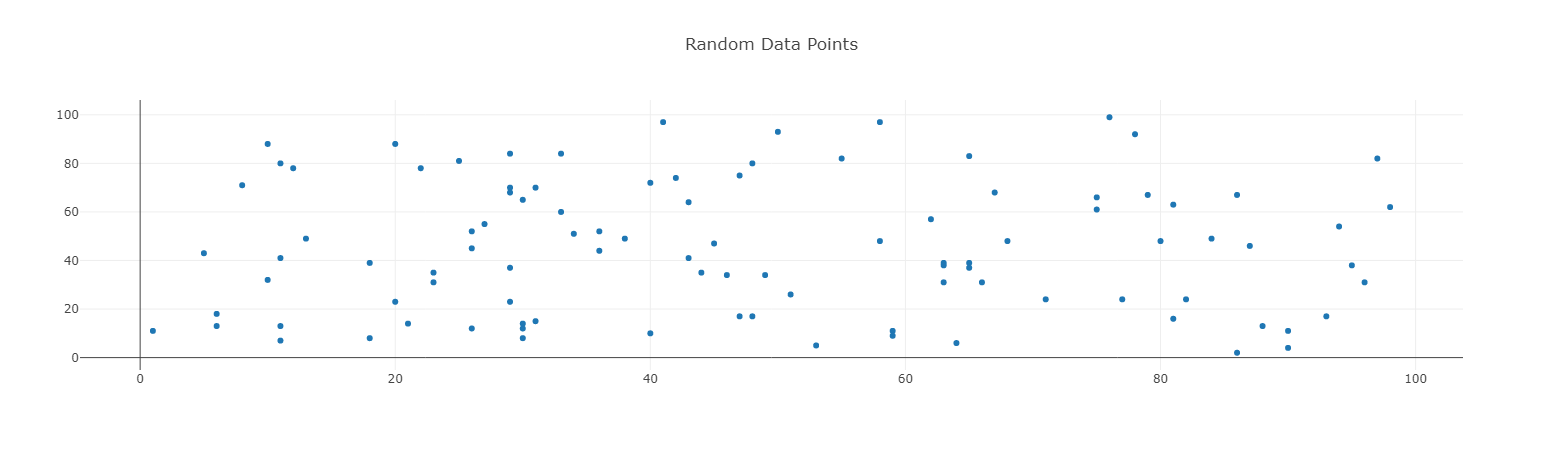

In [5]:
# Create scatter plot points using the random points created above
# All x-coordinates go into one array and all y-coordinates into another
graphPoints = go.Scatter(
    x = [point.X for point in points],
    y = [point.Y for point in points],
    mode = 'markers',
    marker = dict(
        symbol = 'circle'
    ),
    name = 'Random Data'
    
)

layout = go.Layout(
    title='Random Data Points',
    xaxis=dict(
        title='$x-axis\\text{ }(x_1)$'
    ),
    yaxis=dict(
        title='$y-axis\\text{ }(x_2)$'
    )
)

fig = go.Figure(data=[graphPoints], layout=layout)
plt.iplot(fig)


Let's graph a line through the points in which we want to perdict

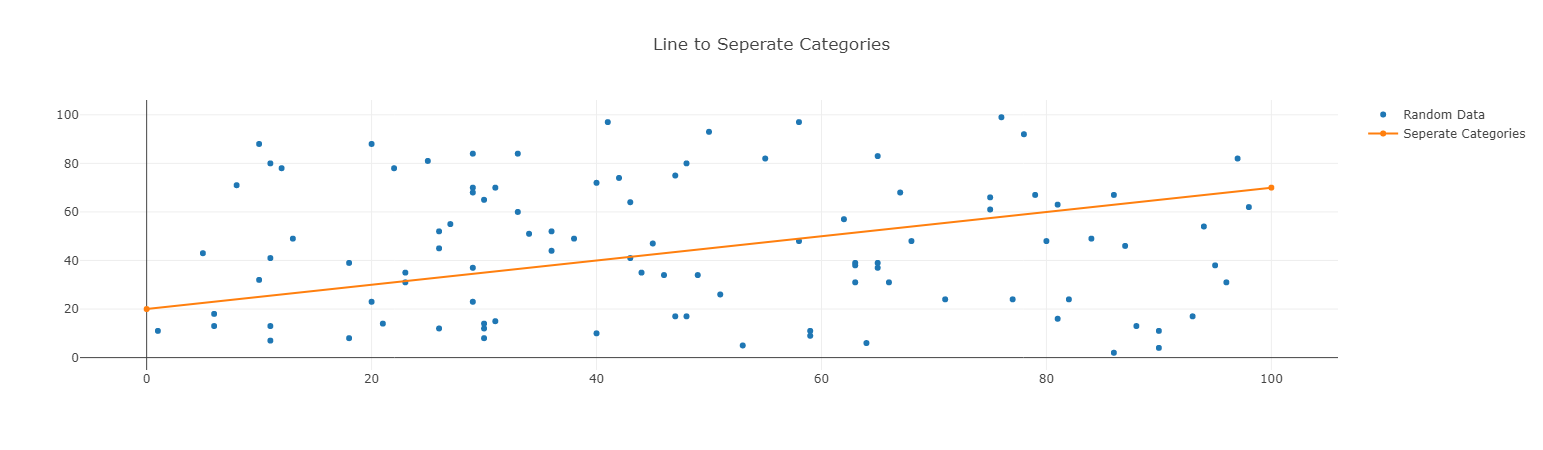

In [6]:
# Plot a line y=mx+b
x = np.linspace(0,numberOfPoints,2)
m = 0.5
b = 20
y = m*x+b

line = go.Scatter(
    x = x,
    y = y,
    name = 'Seperate Categories'
)

layout.title = 'Line to Seperate Categories'
fig = go.Figure(data=[graphPoints, line], layout=layout)
plt.iplot(fig)

Now let's create a Perceptron and use it to guess if the points are above the line or below the line

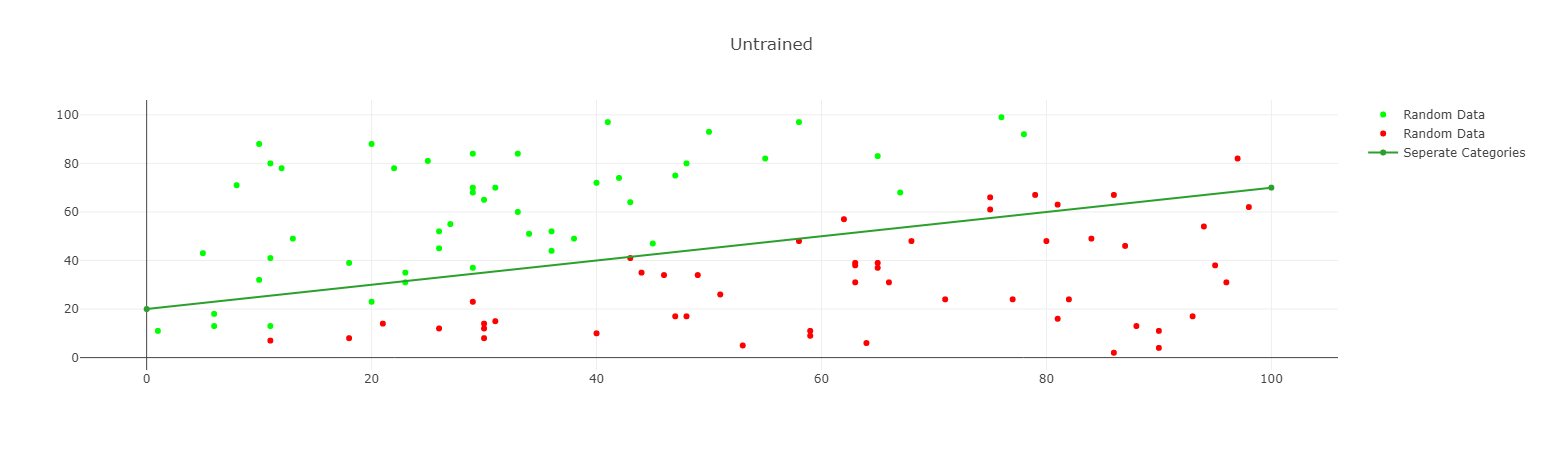

In [7]:
# 
# 1. Using the untrained perceptron, guess if the data points are above or below the line
# 2. Train the perceptron
# 3. Using the trained perceptron, guess if the data points are above or below the line
#
# Note: Green points mean a correct prediction and red points mean an incorrect prediction.
# After the perceptron is trained, all points should be green
#

# Create a Perceptron
perceptron = Perceptron()

# Display the Perceptrons' predictions
# The predictions are incorrect because the perceptron hasn't been trained
# 
c = np.array([])
w = np.array([])

for point in points:
    guess = perceptron.predict(np.array([1, point.X, point.Y]))
    
    if guess == point.Label:
        c = np.append(c, point)
    else:
        w = np.append(w, point)

correct = go.Scatter(
    x = [point.X for point in c],
    y = [point.Y for point in c],
    mode = 'markers',
    marker = dict(
        symbol = 'circle',
        color = 'rgb(0, 255, 0)'
    ),
    name = 'Random Data'   
)

wrong = go.Scatter(
    x = [point.X for point in w],
    y = [point.Y for point in w],
    mode = 'markers',
    marker = dict(
        symbol = 'circle',
        color = 'rgb(255, 0, 0)'
    ),
    name = 'Random Data'  
)

layout.title = 'Untrained'
fig = go.Figure(data=[correct, wrong, line], layout=layout)
plt.iplot(fig)

The perceptron does poorly at guess which points are above and below the line.  The green points indicate a correct guess by the perceptron and red otherwise.

Next, let's train the perceptron.

In [8]:
# Train the Perceptron
for point in points:
    perceptron.train(np.array([1, point.X, point.Y]), point.Label)

Now let's see how the perceptron performs now

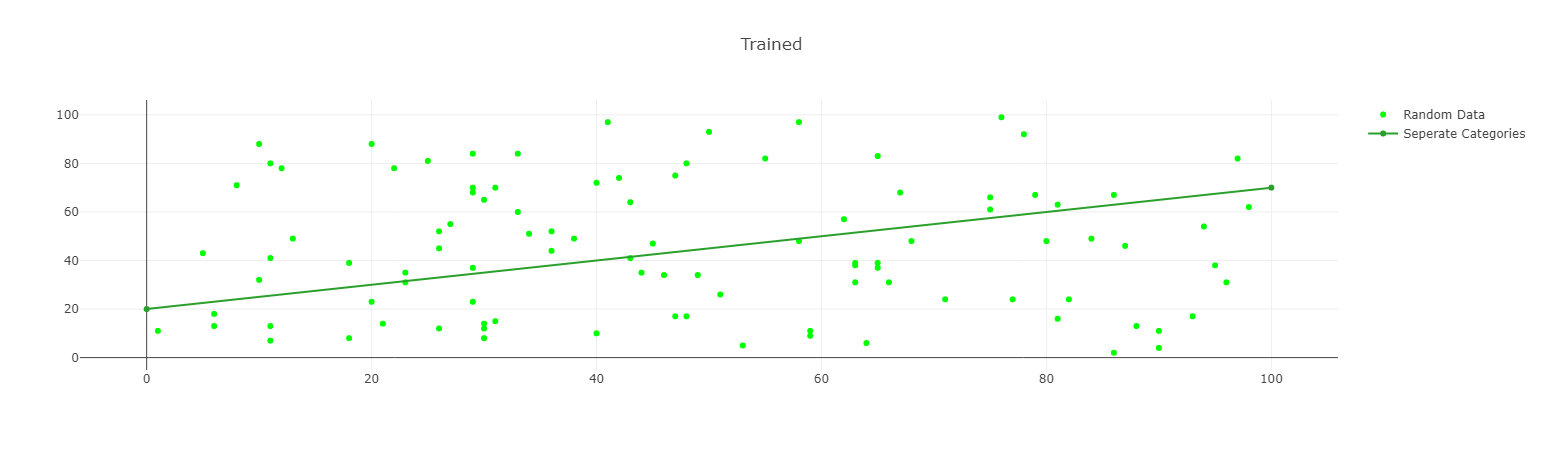

In [9]:
c = np.array([])
w = np.array([])

# Display the Perceptrons' predictions
# The predictions are correct because the perceptrons has been trained
for point in points:
    guess = perceptron.predict(np.array([1, point.X, point.Y]))
    
    if guess == point.Label:
        c = np.append(c, point)
    else:
        w = np.append(w, point)

correct = go.Scatter(
    x = [point.X for point in c],
    y = [point.Y for point in c],
    mode = 'markers',
    marker = dict(
        symbol = 'circle',
        color = 'rgb(0, 255, 0)'
    ),
    name = 'Random Data'   
)

wrong = go.Scatter(
    x = [point.X for point in w],
    y = [point.Y for point in w],
    mode = 'markers',
    marker = dict(
        symbol = 'circle',
        color = 'rgb(255, 0, 0)'
    ),
    name = 'Random Data'  
)

layout.title = 'Trained'
fig = go.Figure(data=[correct, wrong, line], layout=layout)
plt.iplot(fig)   